## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Tasks
1. Importing necessary libraries
2. Preparing the data
3. Training the alogorithm
4. Making Predictions
5. Evalution of the model




In [1]:
# Importing all necessary libraries 
import pandas as pd #  for reading CSV file and converting it into dataframe or for data analysis and manipulation
import numpy as np  # for mathematical computation
import matplotlib.pyplot as plt  # for visualization
%matplotlib inline

In [2]:
# fetching data from the url (remote link)
remote_url = "http://bit.ly/w-data"
student_data = pd.read_csv(remote_url)
print("Data fetched or imported successfully")
# looking at data 
student_data.head(10)

Data fetched or imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Time to plot our data points on 2-D graph to know relationship between the data.

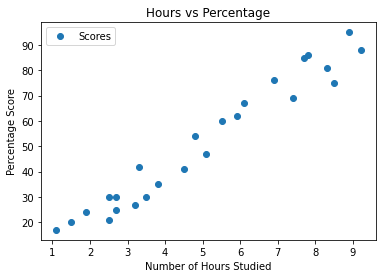

In [3]:
# Plotting the distribution of scores
student_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Number of Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**Above graph shows that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

Let's divide the data into "features" (inputs) and "labels" (outputs).

In [4]:
X = student_data.iloc[:, :-1].values  
y = student_data.iloc[:, 1].values  



Now, data divided into features and labels, the next step is to split this data into training and test sets. This task can be completed by using Scikit-Learn's built-in train_test_split() method:

In [5]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.3, random_state=0) 

### **Training the Algorithm**
It's time to train and test the algorithm beacause data is in the form of training and testing sets.

In [6]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("successfully completed training.")

successfully completed training.


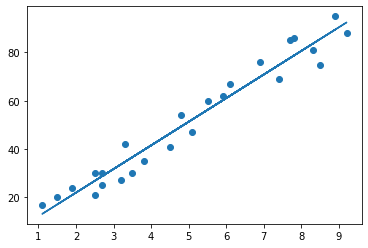

In [7]:
# Let's plot the regression line
line = regressor.coef_*X+regressor.intercept_

# It's time for plotting test data set
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**
It's time to make some predictions beacuse algorithm is ready or trained.

In [8]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

# Printing predicted scores
print(y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]
[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


In [9]:
# Comparision between Actual and Predicted value
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [10]:
# Testing with your own data
hours = 9.25
user_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(user_pred[0]))

No of Hours = 9.25
Predicted Score = 92.91505723477056


### **Evaluating the model**

At last it is necessary to evaluate the performance of algorithm. It is important step which tells about performance of algorithm on a particular dataset. we have chosen the root mean squared error (RMSE).

In [11]:
from sklearn import metrics  
print('Root Mean Squared Error:', 
      metrics.mean_squared_error(y_test, y_pred,squared=False)) 

Root Mean Squared Error: 4.792191274636315
